# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

El propósito del presente proyecto es identificar tendencias de consumo de los clientes de dos pl

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
tarifs = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
tarifs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
print(tarifs.sample())

   messages_included  mb_per_month_included  minutes_included  \
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
1               70           7             0.01            0.01  ultimate  


El dataset nos presenta un panorama general de las características de cada uno de los planes disponibles. 
Derivado del análisis inicial de la base de datos correspondiente a las tarifas, podemos apreciar que si bien el costo del plan considera la medida de GB, se hace referencia alos MB incluidos en cada plan. En ese sentido, resulta necesario ajustar la columna mb_per_month_included y los datos registrados en dicha columna para hacer referencia a los GB. 

## Corregir datos

Se corrigen los problemas obvios. De esta manera las características de los planes coinciden con lo representado en las bases de datos. 
Adicionalmente, se ajustó el nombre de la columna y el tipo de datos para que se manejen en enteros. 

In [5]:
tarifs.rename(columns={'mb_per_month_included':'gb_per_month_included'}, inplace=True)
tarifs['gb_per_month_included'] = tarifs['gb_per_month_included'] / 1024
tarifs['gb_per_month_included'] = tarifs['gb_per_month_included'].astype('int')
print(tarifs)
tarifs.info()

   messages_included  gb_per_month_included  minutes_included  \
0                 50                     15               500   
1               1000                     30              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   gb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   pla

## Enriquecer los datos

Dada la naturaleza de este dataset, cuyo objetivo principal es brindar un panorama general de los datos de cada uno de los planes, no identifiqué datos que pudieran enriquecer a nuestro dataset.  

## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de datos para usuarios
print(users.sample())

     user_id first_name last_name  age                            city  \
362     1362   Kenyetta  Mcknight   65  Denver-Aurora-Lakewood, CO MSA   

       reg_date  plan churn_date  
362  2018-01-18  surf        NaN  


El data set nos muestra los datos de 500 usuarios que contrataron los planes de la compañía Megaline. 

En primera instancia, podemos observar que los datos de la columna user_id se están considerando como datos del tipo int. En ese sentido, será necesrio ajustar el tipo de dato de dicha columna, ya que no se realizarán operaciones con los digitos que componen el id de los usuarios. 

Asimismo, podemos identificar que los datos de la columna reg_date y churn_date se están considerando como datos del tipo object y no como datos del tipo fecha, por lo que será necesario ajustar dichas columnas. 

También, podemos observar que en la columna churn_date únicamente existe el registro de 34 datos. Por lo que será necesario rellenar los datos ausentes para continuar con el análisis. 

### Corregir los datos


Corregimos el tipo de datos de la columna user_id y lo convertimos a string.
Asimismo, corregimos el tipo de datos de las columnas reg_date y churn_date para convertirlos a formatos de tiempo. 

In [8]:
users['user_id'] = users['user_id'].astype('str')
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])
users['churn_date'] = users['churn_date'].fillna('NaT')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 31.4+ KB


### Enriquecer los datos

Derivado del análisis no pude identificar que en la columna 'city' se asentaron las ciudades y las áreas correspondiente a cada usuario. En ese sentido, en caso de que únicamente se requiera hacer un análisis de áreas, se estima necesario separar los datos de las áreas y las ciudades. 

In [9]:
users[['city','area']] = users['city'].str.split(',',n=1,expand=True)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
 8   area        500 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 35.3+ KB


## Llamadas

In [10]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Imprime una muestra de datos para las llamadas
print(calls.sample())


             id  user_id   call_date  duration
79154  1283_110     1283  2018-11-29     16.22


El dataset nos muestra la cantidad de llamadas que cada usuario realizó durante un periodo de tiempo determinado, así como la duración de cada una de las llamadas. 

Es necesario ajustar el tipo de dato de la columna user_id para que esta sea del tipo object. 

Asimismo, es necesario ajustar el tipo de dato de la columna call_date para que esta sea del tipo fecha. 

No se identifican celdas vacías, por lo que no es necesario procesar dichos datos. 

### Corregir los datos

Corregimos el tipo de datos de la columna user_id y lo convertimos a string.
Asimismo, corregimos el tipo de dato de la columna call_date para convertirlo a formato de fecha. 

In [12]:
calls['user_id'] = calls['user_id'].astype('str')
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


### Enriquecer los datos

Para brindar más claridad a los datos, podemos ajustar el numbre de la columna duration a duration_minutes.

Asimismo, ya que se nos solicitará un análisis mensual, podemos crear una nueva columna para almacenar el mes en la que se llevó a cabo cada llamada. 

In [13]:
calls.rename(columns={'duration':'duration_minutes'}, inplace=True)
calls['month'] = calls['call_date'].dt.month_name()
calls.info()
print(calls.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                137735 non-null  object        
 1   user_id           137735 non-null  object        
 2   call_date         137735 non-null  datetime64[ns]
 3   duration_minutes  137735 non-null  float64       
 4   month             137735 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 5.3+ MB
         id user_id  call_date  duration_minutes     month
0   1000_93    1000 2018-12-27              8.52  December
1  1000_145    1000 2018-12-27             13.66  December
2  1000_247    1000 2018-12-27             14.48  December
3  1000_309    1000 2018-12-28              5.76  December
4  1000_380    1000 2018-12-30              4.22  December


## Mensajes

In [14]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
# Imprime una muestra de datos para los mensajes
print(messages.sample())

             id  user_id message_date
31734  1196_219     1196   2018-04-03


En la base de datos podemos observar los datos de los mensajes remitidos por cada usuario. 

Es necesario ajustar el tipo de datos de la columna user_id para que este sea de tipo object. 

De igual manera, es necesario ajustar el tipo de dato de la columna message_date para que este sea de tipo fecha. 

### Corregir los datos

Corregimos el tipo de datos de la columna user_id y lo convertimos a string.
Asimismo, corregimos el tipo de dato de la columna message_date para convertirlo a formato de fecha. 

In [16]:
messages['user_id'] = messages['user_id'].astype('str')
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


### Enriquecer los datos

Ya que se nos solicitará un análisis mensual, podemos crear una nueva columna para almacenar el mes en la que se envió cada mensaje.

In [17]:
messages['month'] = messages['message_date'].dt.month_name()
messages.info()
print(messages.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.3+ MB
         id user_id message_date     month
0  1000_125    1000   2018-12-27  December
1  1000_160    1000   2018-12-31  December
2  1000_223    1000   2018-12-31  December
3  1000_251    1000   2018-12-27  December
4  1000_255    1000   2018-12-26  December


## Internet

In [18]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [19]:
# Imprime una muestra de datos para el tráfico de internet
print(internet.sample())

             id  user_id session_date  mb_used
14225  1066_115     1066   2018-09-06   176.67


El dataset nos muestra los datos correspondientes a la cantidad de MB que los usuarios utilizaron en un tiempo determinado. Detallando la fecha en que dichos usuarios consumieron dicha cantidad de MB. 

Podemos observar que el user_id se muestra como entero, por lo que es necesario ajustar el tipo de dato de dicha columna. 
Asímismo, podemos observar que la columna session_date se muestra como objeto, por lo que también será necesario ajustar el tipo de dato de dicha columna. 

### Corregir los datos

Corregimos el tipo de datos de la columna user_id y lo convertimos a string.
Asimismo, corregimos el tipo de dato de la columna session_date para convertirlo a formato de fecha. 

In [20]:
internet['user_id'] = internet['user_id'].astype('str')
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


### Enriquecer los datos

Podríamos agregar la cantidad de GB utilizados por usuario, para tener la conversión a la mano en caso de ser necesaria. 

Asimismo, ya que se nos solicitará un análisis mensual, podemos crear una nueva columna para almacenar el mes en la que se utilizaron los datos.

In [21]:
internet['gb_used'] = internet['mb_used'] / 1024
internet ['month'] = internet['session_date'].dt.month_name()
internet.info()
print(internet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   gb_used       104825 non-null  float64       
 5   month         104825 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 4.8+ MB
         id user_id session_date  mb_used   gb_used     month
0   1000_13    1000   2018-12-29    89.86  0.087754  December
1  1000_204    1000   2018-12-31     0.00  0.000000  December
2  1000_379    1000   2018-12-28   660.40  0.644922  December
3  1000_413    1000   2018-12-26   270.99  0.264639  December
4  1000_442    1000   2018-12-27   880.22  0.859590  December


## Estudiar las condiciones de las tarifas

A continuación se muestra la información de cada uno de las tarifas ofrecidas por la empresa: 

In [22]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(tarifs)

   messages_included  gb_per_month_included  minutes_included  \
0                 50                     15               500   
1               1000                     30              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregar datos por usuario

Pra facilitar el análisis se llevamos a cabo la agrupación de los datos por usuario y por mes. 

In [23]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_per_user_month = calls.groupby(['user_id','month']).size().reset_index(name='total_calls')
print(calls_per_user_month)

     user_id      month  total_calls
0       1000   December           16
1       1001     August           27
2       1001   December           56
3       1001   November           64
4       1001    October           65
...      ...        ...          ...
2253    1498  September           45
2254    1499   December           65
2255    1499   November           45
2256    1499    October           53
2257    1499  September           41

[2258 rows x 3 columns]


In [24]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_user_month = calls.groupby(['user_id','month'])['duration_minutes'].sum().reset_index(name='total_minutes')
print(minutes_per_user_month)

     user_id      month  total_minutes
0       1000   December         116.83
1       1001     August         171.14
2       1001   December         392.93
3       1001   November         404.59
4       1001    October         374.11
...      ...        ...            ...
2253    1498  September         344.62
2254    1499   December         468.10
2255    1499   November         288.56
2256    1499    October         363.28
2257    1499  September         330.37

[2258 rows x 3 columns]


In [25]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_per_user_month = messages.groupby(['user_id','month']).size().reset_index(name='total_messages')
print(messages_per_user_month)

     user_id      month  total_messages
0       1000   December              11
1       1001     August              30
2       1001   December              44
3       1001   November              36
4       1001    October              53
...      ...        ...             ...
1801    1496   December              11
1802    1496   November              13
1803    1496    October              18
1804    1496  September              21
1805    1497   December              50

[1806 rows x 3 columns]


In [26]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   gb_used       104825 non-null  float64       
 5   month         104825 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 4.8+ MB


In [27]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
gb_per_user_month = internet.groupby(['user_id','month'])['gb_used'].sum().reset_index(name='total_gb')
mb_per_user_month = internet.groupby(['user_id','month'])['mb_used'].sum().reset_index(name='total_mb')
print(gb_per_user_month)
print('-------------------------------------------------------')
print(mb_per_user_month)

     user_id      month   total_gb
0       1000   December   1.856904
1       1001     August   6.756982
2       1001   December  18.915215
3       1001   November  18.070605
4       1001    October  21.807119
...      ...        ...        ...
2272    1498  September  22.292266
2273    1499   December  21.542197
2274    1499   November  16.419756
2275    1499    October  19.035576
2276    1499  September  12.680430

[2277 rows x 3 columns]
-------------------------------------------------------
     user_id      month  total_mb
0       1000   December   1901.47
1       1001     August   6919.15
2       1001   December  19369.18
3       1001   November  18504.30
4       1001    October  22330.49
...      ...        ...       ...
2272    1498  September  22827.28
2273    1499   December  22059.21
2274    1499   November  16813.83
2275    1499    October  19492.43
2276    1499  September  12984.76

[2277 rows x 3 columns]


Para tener todos los datos que necesitaremos para nuestro análisis a la mano, juntamos todos los totales que calculamos en secciones anteriores en un solo DatFrame. 

In [28]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
merged_1 = pd.merge(calls_per_user_month, minutes_per_user_month, on=['user_id','month'],how='outer')
merged_2 = pd.merge(merged_1, messages_per_user_month, on=['user_id','month'],how='outer')
merged_3 = pd.merge(merged_2, gb_per_user_month, on=['user_id','month'],how='outer')
final_merge = pd.merge(merged_3, mb_per_user_month, on=['user_id', 'month'],how='outer')
final_merge.fillna(0,inplace=True)
print(final_merge)

     user_id     month  total_calls  total_minutes  total_messages   total_gb  \
0       1000  December         16.0         116.83            11.0   1.856904   
1       1001    August         27.0         171.14            30.0   6.756982   
2       1001  December         56.0         392.93            44.0  18.915215   
3       1001  November         64.0         404.59            36.0  18.070605   
4       1001   October         65.0         374.11            53.0  21.807119   
...      ...       ...          ...            ...             ...        ...   
2288    1349   October          0.0           0.00            76.0  12.786670   
2289    1361       May          0.0           0.00             2.0   1.484072   
2290    1482   October          0.0           0.00             2.0   0.000000   
2291    1108  December          0.0           0.00             0.0   0.227705   
2292    1311      June          0.0           0.00             0.0   1.463701   

      total_mb  
0      190

In [29]:
# Añade la información de la tarifa
final_merge_plan = pd.merge(final_merge,users[['user_id','plan']], on='user_id',how='left')
final_merge_plan.fillna('Unknown',inplace=True)
tarifs = tarifs.rename(columns={'plan_name':'plan'})
final_merge_tarif = pd.merge(final_merge_plan,tarifs,on='plan',how='left')
print(final_merge_tarif)

     user_id     month  total_calls  total_minutes  total_messages   total_gb  \
0       1000  December         16.0         116.83            11.0   1.856904   
1       1001    August         27.0         171.14            30.0   6.756982   
2       1001  December         56.0         392.93            44.0  18.915215   
3       1001  November         64.0         404.59            36.0  18.070605   
4       1001   October         65.0         374.11            53.0  21.807119   
...      ...       ...          ...            ...             ...        ...   
2288    1349   October          0.0           0.00            76.0  12.786670   
2289    1361       May          0.0           0.00             2.0   1.484072   
2290    1482   October          0.0           0.00             2.0   0.000000   
2291    1108  December          0.0           0.00             0.0   0.227705   
2292    1311      June          0.0           0.00             0.0   1.463701   

      total_mb      plan  m

In [30]:
# Calcula el ingreso mensual para cada usuario
def user_income (row): 
    if row['plan'] == 'ultimate':
        minutes_included = row['minutes_included']
        messages_included = row['messages_included']
        gb_included = row['gb_per_month_included']
        monthly_fee = row['usd_monthly_pay']
        rate_per_minute = row['usd_per_minute']
        rate_per_message = row['usd_per_message']
        rate_per_gb = row['usd_per_gb']
    elif row['plan'] == 'surf': 
        minutes_included = row['minutes_included']
        messages_included = row['messages_included']
        gb_included = row['gb_per_month_included']
        monthly_fee = row['usd_monthly_pay']
        rate_per_minute = row['usd_per_minute']
        rate_per_message = row['usd_per_message']
        rate_per_gb = row['usd_per_gb']
        
    excedente_minutes = max(0,row['total_minutes'] - minutes_included)
    excedente_messages = max(0,row['total_messages'] - messages_included)
    excedente_gb = max(0,row['total_gb'] - gb_included)
    
    excedent_minutes_cost = excedente_minutes * rate_per_minute
    excedent_messages_cost = excedente_messages * rate_per_message
    excedent_gb_cost = excedente_gb * rate_per_gb
    
    total_cost = monthly_fee + excedent_minutes_cost + excedent_messages_cost + excedent_gb_cost
    
    return total_cost

final_merge_tarif['monthly_revenue'] = final_merge_tarif.apply(user_income, axis=1)

print(final_merge_tarif[['user_id','month','plan','usd_monthly_pay','monthly_revenue']])

     user_id     month      plan  usd_monthly_pay  monthly_revenue
0       1000  December  ultimate               70        70.000000
1       1001    August      surf               20        20.000000
2       1001  December      surf               20        59.152148
3       1001  November      surf               20        50.706055
4       1001   October      surf               20        88.161191
...      ...       ...       ...              ...              ...
2288    1349   October      surf               20        20.780000
2289    1361       May      surf               20        20.000000
2290    1482   October  ultimate               70        70.000000
2291    1108  December  ultimate               70        70.000000
2292    1311      June  ultimate               70        70.000000

[2293 rows x 5 columns]


## Estudia el comportamiento de usuario

Para identificar cual de las tarifas es más rentable, llevaremos a cabo diversos análisis estadísticos en las que estudiaremos el comportamiento de los usuarios de cada plan, identificando patrones y tendencias en cuestiones de llamadas, mensajes y datos de internet consumidos. 

### Llamadas

<AxesSubplot:title={'center':'Duración promedio de llamadas por plan y mes'}, xlabel='Mes', ylabel='Duración promeido de llamadas (min)'>

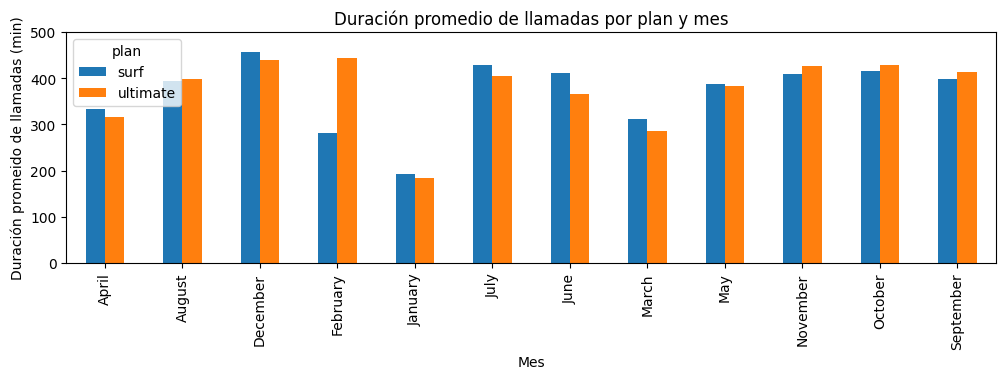

In [31]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
calls_clean = final_merge_tarif[(final_merge_tarif['total_minutes']>0)]
calls_avg_duration = calls_clean.groupby(['plan','month'])['total_minutes'].mean().reset_index()
pivot_table = calls_avg_duration.pivot(index='month', columns='plan',values='total_minutes')
pivot_table.plot(title ='Duración promedio de llamadas por plan y mes',
                        xlabel='Mes',
                        ylabel='Duración promeido de llamadas (min)',
                 ylim = (0,500),
                        kind = 'bar',
                 figsize = (12,3)
                       )

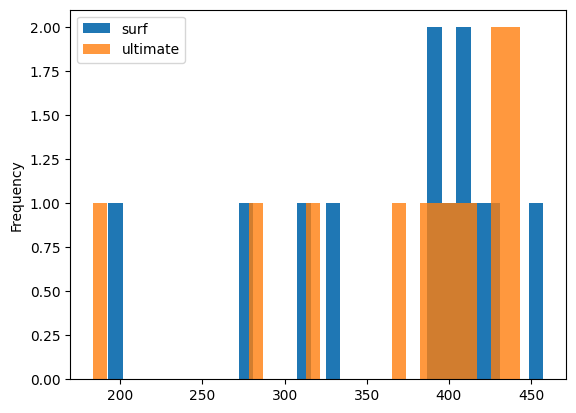

In [32]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
calls_avg_duration[calls_avg_duration['plan']=='surf']['total_minutes'].plot(kind='hist',bins=30,label='surf')
minutes_ultimate = calls_avg_duration[calls_avg_duration['plan']=='ultimate']['total_minutes'].plot(kind='hist',bins=30,label='ultimate', alpha=0.8)
plt.legend(['surf','ultimate'])

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [33]:
# Calcula la media y la varianza de la duración mensual de llamadas.
plan_group = calls_avg_duration.groupby('plan')
mean_values = plan_group['total_minutes'].mean()
var_values = plan_group['total_minutes'].var()
print('El valor del promedio de minutos por llamada por plan es: \n',mean_values)
print('El valor de la varianza de minutos por llamada por plan es: \n',var_values)

El valor del promedio de minutos por llamada por plan es: 
 plan
surf        368.108415
ultimate    373.928638
Name: total_minutes, dtype: float64
El valor de la varianza de minutos por llamada por plan es: 
 plan
surf        5652.032518
ultimate    5956.991864
Name: total_minutes, dtype: float64


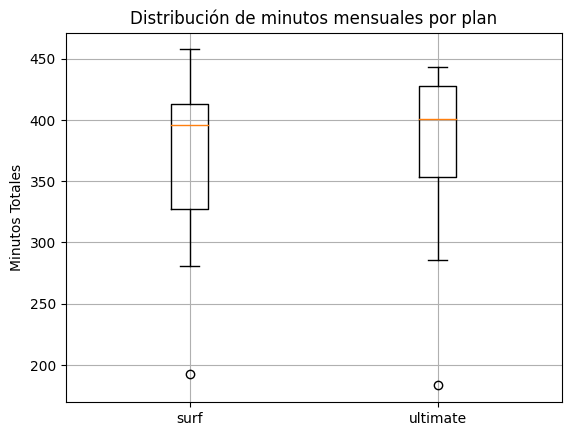

In [34]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
surf_minutes = calls_avg_duration[calls_avg_duration['plan']=='surf']['total_minutes']
ultimate_minutes = calls_avg_duration[calls_avg_duration['plan']=='ultimate']['total_minutes']
plt.boxplot([surf_minutes,ultimate_minutes], labels=['surf','ultimate'])
plt.title('Distribución de minutos mensuales por plan')
plt.ylabel('Minutos Totales')
plt.grid(True)


Existen variaciones menores entre los usuarios de los planes, los hallazgos principales de este análisis son: 
- Se puede identificar que, en promedio, los clientes del plan surf y ultimate no pasan el límite de minutos por mes. Ambos clientes se encuentran por debajo de los 400 minutos utilizados por mes. 
- Es importante mencionar que existe una mayor variación del promedio de llamadas por mes entre los usuarios del plan surf que con los usuarios del plan ultimate. 
- Existen valores atípicos en ambos casos, pues se identificaron clientes que hablan menos de 200 minutos al mes. 

A groso modo, si solo consideraramos el factor de las llamadas, podríamos decir que con el plan ultimate se generan más ingresos. Esto debido a que, ya que en nunguno de los planes se exceden el límite de minutos, no se generan cargos adicionales. En ese sentido, toda vez que el plan ultimate tiene un costo mayor, dicho plan por si solo genera más ingresos que el plan surf. 

### Mensajes

<AxesSubplot:title={'center':'Mensajes remitidos por mes'}, xlabel='Mes', ylabel='Cantidad de mensajes'>

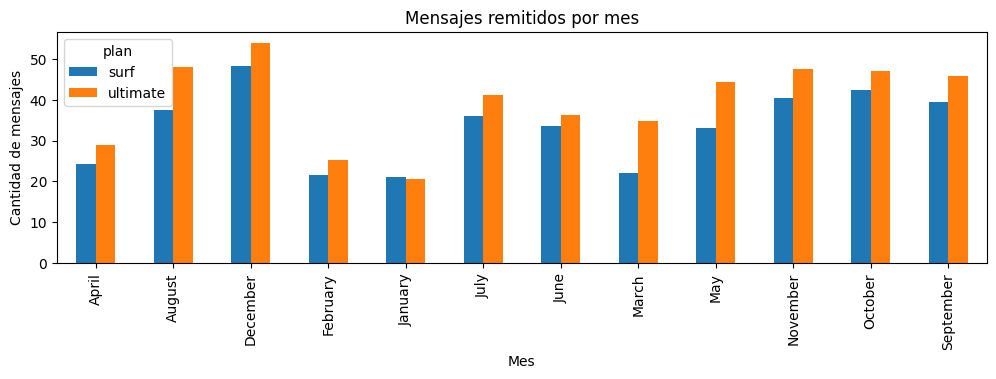

In [35]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
messages_clean = final_merge_tarif[(final_merge_tarif['total_messages']>0)]
messages_avg = messages_clean.groupby(['plan','month'])['total_messages'].mean().reset_index()
pivot_table_messages = messages_avg.pivot(index='month', columns='plan',values='total_messages')
pivot_table_messages.plot(title ='Mensajes remitidos por mes',
                          xlabel='Mes',
                          ylabel='Cantidad de mensajes',
                          kind = 'bar',
                          figsize = (12,3)
                         )

In [36]:
plan_group_messages = messages_avg.groupby('plan')
mean_values_m = plan_group_messages['total_messages'].mean()
var_values_m = plan_group_messages['total_messages'].var()
print('El valor del promedio de mensajes por plan es: \n',mean_values_m)
print('El valor de la varianza de mensajes por plan es: \n',var_values_m)

El valor del promedio de mensajes por plan es: 
 plan
surf        33.309767
ultimate    39.472325
Name: total_messages, dtype: float64
El valor de la varianza de mensajes por plan es: 
 plan
surf         84.264368
ultimate    106.655358
Name: total_messages, dtype: float64


<Figure size 600x300 with 0 Axes>

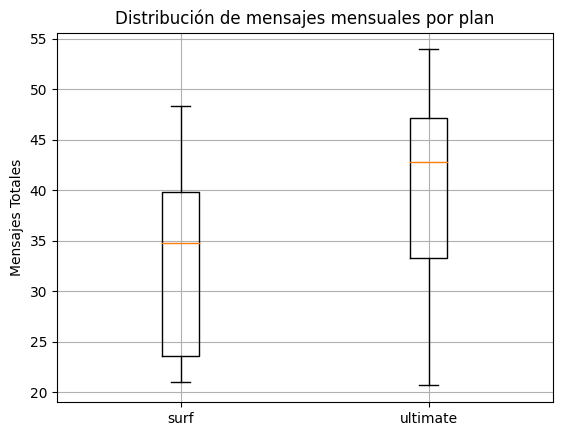

<Figure size 600x300 with 0 Axes>

In [51]:
surf_messages = messages_avg[messages_avg['plan']=='surf']['total_messages']
ultimate_messages = messages_avg[messages_avg['plan']=='ultimate']['total_messages']
plt.boxplot([surf_messages,ultimate_messages], labels=['surf','ultimate'])
plt.title('Distribución de mensajes mensuales por plan')
plt.ylabel('Mensajes Totales')
plt.grid(True)
plt.figure(figsize=(6,3))

Existen variaciones menores entre los usuarios de los planes, los hallazgos principales de este análisis son:

- Se puede identificar que ninguno de los usuarios supera el límite establecido por su respectivo plan. 
- Se identificó que se consumen más mensajes en el plan ultimate que en el plan surf. Esto podría ser ya que, con el fin de evitar cargos adicionales, los usuarios del plan surf procuren usar la menor cantidad de mensajes posibles. Sin embargo, toda vez que la variación de los datos de ambos planes no es tan significativa la baja en la emisión de los mensajes puede ser algo generalizado para ambos clientes y no necesariamente estar relacionado con las tarifas de los planes. 

Considerando lo analizado tanto para llamadas como para mensajes, podríamos decir que con el plan ultimate se generan más ingresos. Esto debido a que, ya que en ninguno de los planes se exceden el límite de minutos, no se generan cargos adicionales. En ese sentido, toda vez que el plan ultimate tiene un costo mayor, dicho plan por si solo genera más ingresos que el plan surf.

### Internet

<AxesSubplot:title={'center':'GB consumidos al mes'}, xlabel='Mes', ylabel='GB de datos'>

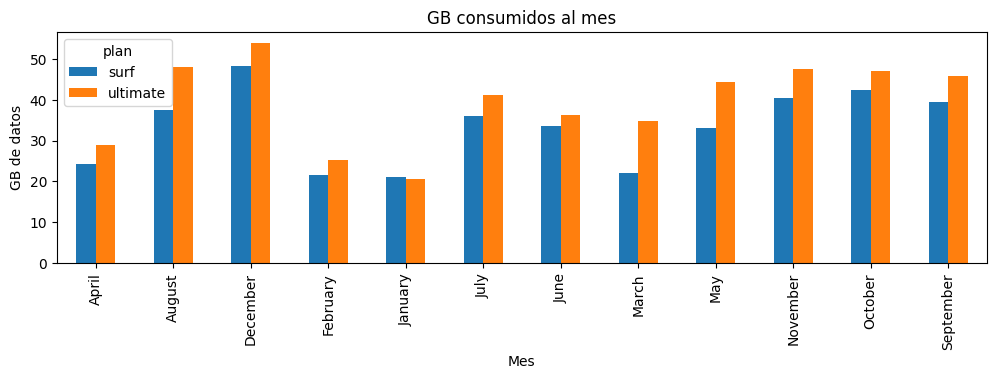

In [38]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
internet_clean = final_merge_tarif[(final_merge_tarif['total_gb']>0)]
internet_avg = internet_clean.groupby(['plan','month'])['total_gb'].mean().reset_index()
pivot_table_gb = internet_avg.pivot(index='month', columns='plan',values='total_gb')
pivot_table_messages.plot(title ='GB consumidos al mes',
                          xlabel='Mes',
                          ylabel='GB de datos',
                          kind = 'bar',
                          figsize = (12,3)
                         )

In [39]:
plan_group_internet = internet_avg.groupby('plan')
mean_values_g = plan_group_internet['total_gb'].mean()
var_values_g = plan_group_internet['total_gb'].var()
print('El valor del promedio de GB consumidas por plan es: \n',mean_values_g)
print('El valor de la varianza de GB consumidas por plan es: \n',var_values_g)

El valor del promedio de GB consumidas por plan es: 
 plan
surf        14.262931
ultimate    15.846271
Name: total_gb, dtype: float64
El valor de la varianza de GB consumidas por plan es: 
 plan
surf        12.993675
ultimate     8.961038
Name: total_gb, dtype: float64


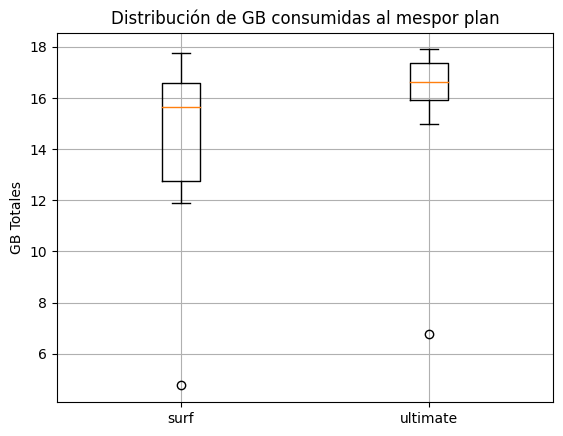

In [40]:
surf_gb = internet_avg[internet_avg['plan']=='surf']['total_gb']
ultimate_gb = internet_avg[internet_avg['plan']=='ultimate']['total_gb']
plt.boxplot([surf_gb,ultimate_gb], labels=['surf','ultimate'])
plt.title('Distribución de GB consumidas al mespor plan')
plt.ylabel('GB Totales')
plt.grid(True)

Existen variaciones menores entre los usuarios de los planes, los hallazgos principales de este análisis son:

- Se puede identificar que en el plan surf por lo general se conusmen mas GB de las incluidas en el paquete.  . 
- Existe una mayor variación entre los datos de los clientes de surf que en los de ultimate, lo cual podría respaldar la teoría de que los clientes del plan surf ahorran GB. 

Considerando lo analizado y ya que en el plan surf se excede el límite de los datos, gracias a esta diferencia significativa, el plan surf podría ser más rentable. 

## Ingreso

<AxesSubplot:title={'center':'Ingresos mensuales por plan'}, xlabel='Mes', ylabel='Ingresos (usd)'>

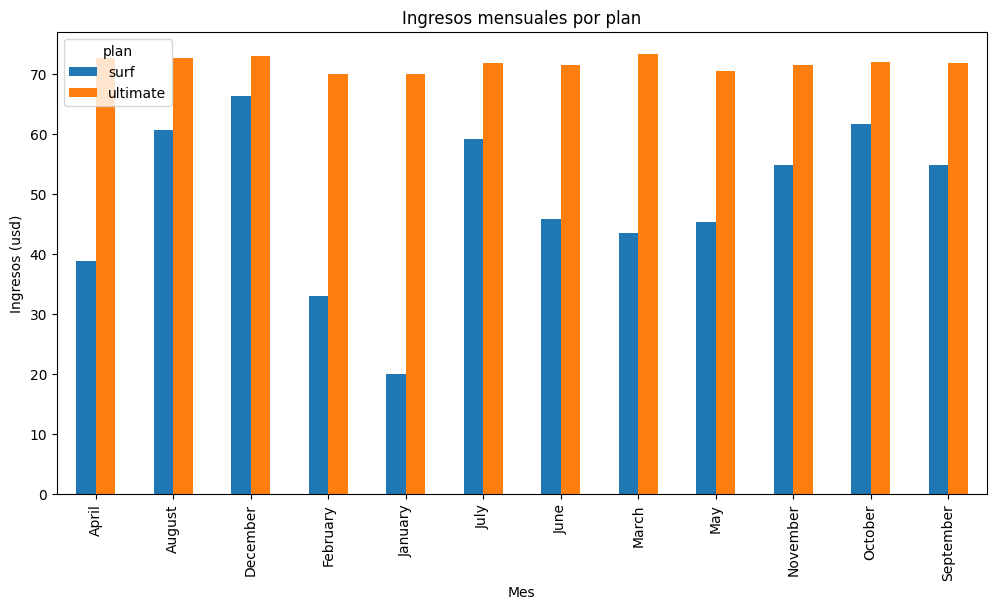

In [41]:
monthly_revenue_avg = final_merge_tarif.groupby(['plan','month'])['monthly_revenue'].mean().reset_index()
pivot_table_revenue = monthly_revenue_avg.pivot(index='month', columns='plan',values='monthly_revenue')
pivot_table_revenue.plot(title ='Ingresos mensuales por plan',
                          xlabel='Mes',
                          ylabel='Ingresos (usd)',
                          kind = 'bar',
                          figsize = (12,6)
                         )

In [42]:
plan_group_mrevenue = monthly_revenue_avg.groupby('plan')
mean_values_mrevenue = plan_group_mrevenue['monthly_revenue'].mean()
var_values_mrevenue = plan_group_mrevenue['monthly_revenue'].var()
print('El valor del promedio de ingresos por plan es: \n',mean_values_mrevenue)
print('El valor de la varianza de ingresos por plan es: \n',var_values_mrevenue)

El valor del promedio de ingresos por plan es: 
 plan
surf        48.692637
ultimate    71.769830
Name: monthly_revenue, dtype: float64
El valor de la varianza de ingresos por plan es: 
 plan
surf        183.931373
ultimate      1.286904
Name: monthly_revenue, dtype: float64


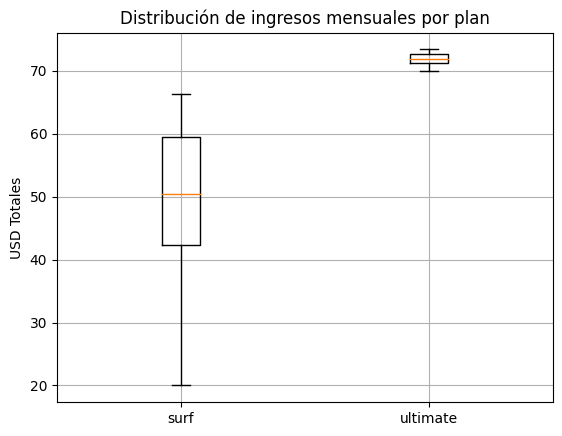

In [43]:
surf_revenue = monthly_revenue_avg[monthly_revenue_avg['plan']=='surf']['monthly_revenue']
ultimate_revenue = monthly_revenue_avg[monthly_revenue_avg['plan']=='ultimate']['monthly_revenue']
plt.boxplot([surf_revenue,ultimate_revenue], labels=['surf','ultimate'])
plt.title('Distribución de ingresos mensuales por plan')
plt.ylabel('USD Totales')
plt.grid(True)

In [44]:
user_count_by_plan = final_merge_tarif['plan'].value_counts()
print('El número total de usuarios por plan corresponde a: \n' ,user_count_by_plan)

El número total de usuarios por plan corresponde a: 
 surf        1573
ultimate     720
Name: plan, dtype: int64


Existe una gran variación entre el comportamiento de los datos: 

1. En primera instancia, podemos observar que el promedio de ingreso mensual para el caso del plan surf suele ser un poco más que el doble, mientras que para el plan ultimate por lo general se maniente en los 70 (costo mensual original). 
2. Si bien existe una gran variación entre los ingresos mensuales para el plan surf, el promedio suele ser superior. Esto quiere decir que la mayoría de las veces los clientes suelen pagar más cuando contratan el plan surf. Por el contrario la variación del plan ultimate es mínima, lo cual indica que los clientes practicamente pagan lo que contratan. 
3. Se identificó más personas contratan el paquete surf que el ultimate. 

Por lo anterior, podemos identificar que el paquete surf resulta más rentable para la empresa, por lo que la estrategia de marketing a implementar debe centrarse en promovre dicho paquete. 

## Prueba las hipótesis estadísticas

Hipótesis nula: Los ingresos promedios procedentes de los usuarios de los planes Ultimate y Surf son iguales. 
Hipótesis alternativa: Los ingresos promedios procedentes de los usuarios de los planes Ultimate y Surf son diferentes. 

In [45]:
# Prueba las hipótesis
alpha=0.05
results=st.ttest_ind(surf_revenue,ultimate_revenue)
print('Valor p: ',results.pvalue)
if results.pvalue < alpha: 
    print('Rechazamos la hipótesis nula')
else: 
    print('No podemos rechazar la hipótesis nula')

Valor p:  6.543512786711059e-06
Rechazamos la hipótesis nula


Hipótesis nula: El ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones. 
Hiótesis alternativa: El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones. 

In [46]:
# Prueba las hipótesis
just_area = users[['user_id','area']]
merge_area = pd.merge(final_merge_tarif, just_area, on=['user_id'],how='outer').dropna()
nynj_users = merge_area[merge_area['area'] == ' NY-NJ-PA MSA']['monthly_revenue']
other_users = merge_area[merge_area['area'] != ' NY-NJ-PA MSA']['monthly_revenue']
alpha=0.05
results_1=st.ttest_ind(nynj_users,other_users)
print('Valor p: ',results_1.pvalue)
if results_1.pvalue < alpha: 
    print('Rechazamos la hipótesis nula')
else: 
    print('No podemos rechazar la hipótesis nula')

Valor p:  0.026101704425405825
Rechazamos la hipótesis nula


## Conclusión general

Conclusiones particulares: 
1. Existe una mayor tendencia a contratar el paquete surf que el ultimate. 
2. El ingreso promedio mensual del paquete surf suele ser de 50 usd (es decir, más del doble del costo original del paquete). 
3. El ingreso promeidio mensual del paquete ultimate suele ser de 70 usd (es decir, el costo original del paquete). 
4. El consumo de datos suele excederse en el plan surf, motivo por el cual los ingresos promedios de dicho plan suelen ser superiores al costo del paquete. 

Conclusión general: 
1. La estrategia de marketing debe ser enfocada en promover la contratación del plan Surf. Lo anterior en virtud de que existe una mayor tendencia de la gente a contratar dicho plan, así como de exceder el límite de los GB, lo cual incrementará el ingreso mensual de cada cliente.